In [1]:
# In this notebook the direction of the neutrino will be shown

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import numpy as np

%matplotlib widget

In [31]:
# Define the coordinates of the two points for all cases

# HMain_Reco.sh.o15600964
sim_coords = [-980.138, -54.1228, -55.5556]
sim_direct = [1, 0, 6.12323e-17]
t = 0.00118439

point_real = [-981.484, -54.1328, -88.8495]
t_real = 0.0
azimuth = 177.55461576866935
zenith = 0.40001839531296546

# HMain_Reco.sh.o15612050
a_sim_coords = [-695.588, 621.987, 388.889]
a_sim_direct = [1, 0, 6.12323e-17]
a_t = -0.0393061

a_point_real = [-131.103, 737.302, 406.957]
a_t_real = 0.0
a_azimuth = 7.111161630393332 
a_zenith = 0.36766631573938

# HMain_Reco.sh.o15612055
b_sim_coords = [428.059, -670.111, 43.6583]
b_sim_direct = [1, 0, 6.12323e-17]
b_t = -9.35213e-08

b_point_real = [428.059, -670.111, 43.6585]
b_t_real = 0.0
b_azimuth = 2.060707542760527
b_zenith = 27.161321428271847

In [32]:
# HMain_Reco.sh.o15600964
sim_x_coords = [sim_coords[0], sim_direct[0]]
sim_y_coords = [sim_coords[1], sim_direct[1]]
sim_z_coords = [sim_coords[2], sim_direct[2]]

# HMain_Reco.sh.o15612050
a_sim_x_coords = [a_sim_coords[0], a_sim_direct[0]]
a_sim_y_coords = [a_sim_coords[1], a_sim_direct[1]]
a_sim_z_coords = [a_sim_coords[2], a_sim_direct[2]]

# HMain_Reco.sh.o15612055
b_sim_x_coords = [b_sim_coords[0], b_sim_direct[0]]
b_sim_y_coords = [b_sim_coords[1], b_sim_direct[1]]
b_sim_z_coords = [b_sim_coords[2], b_sim_direct[2]]

In [33]:
def create_vector_from_angles(point_real, zenith_degrees, azimuth_degrees):
    # Convert angles to radians
    zenith_radians = math.radians(zenith_degrees)
    azimuth_radians = math.radians(azimuth_degrees)

    # Extract the coordinates of the point
    x, y, z = point_real

    # Calculate the components of the vector
    x_new = x + math.sin(zenith_radians) * math.cos(azimuth_radians)
    y_new = y + math.sin(zenith_radians) * math.sin(azimuth_radians)
    z_new = z + math.cos(zenith_radians)

    # Return the new vector as a tuple
    return (x_new, y_new, z_new)

In [34]:
x_new, y_new, z_new = create_vector_from_angles(point_real, zenith, azimuth)
a_x_new, a_y_new, a_z_new = create_vector_from_angles(a_point_real, a_zenith, a_azimuth)
b_x_new, b_y_new, b_z_new = create_vector_from_angles(b_point_real, b_zenith, b_azimuth)

In [35]:
real_x_coords = [point_real[0], x_new]
real_y_coords = [point_real[1], y_new]
real_z_coords = [point_real[2], z_new]

a_real_x_coords = [a_point_real[0], a_x_new]
a_real_y_coords = [a_point_real[1], a_y_new]
a_real_z_coords = [a_point_real[2], a_z_new]

b_real_x_coords = [b_point_real[0], b_x_new]
b_real_y_coords = [b_point_real[1], b_y_new]
b_real_z_coords = [b_point_real[2], b_z_new]

In [36]:
# Extend the lines of the real neutrino
real_point1 = np.array(point_real)
real_point2 = np.array([x_new, y_new, z_new])
a_real_point1 = np.array(a_point_real)
a_real_point2 = np.array([a_x_new, a_y_new, a_z_new])
b_real_point1 = np.array(b_point_real)
b_real_point2 = np.array([b_x_new, b_y_new, b_z_new])

# Calculate the direction vector
direction_vector = real_point1 - real_point2
a_direction_vector = a_real_point1 - a_real_point2
b_direction_vector = b_real_point1 - b_real_point2

# Extend the line in both directions
extension_factor = 100000
extended_point1 = real_point1 - extension_factor * direction_vector
extended_point2 = real_point2 + extension_factor * direction_vector
a_extended_point1 = a_real_point1 - extension_factor * a_direction_vector
a_extended_point2 = a_real_point2 + extension_factor * a_direction_vector
b_extended_point1 = b_real_point1 - extension_factor * b_direction_vector
b_extended_point2 = b_real_point2 + extension_factor * b_direction_vector

# Create an array of points along the extended line
t = np.linspace(0, 1, 100)  # Adjust the number of points as needed

# Calculate the coordinates of points along the extended line
x_line = extended_point1[0] * (1 - t) + extended_point2[0] * t
y_line = extended_point1[1] * (1 - t) + extended_point2[1] * t
z_line = extended_point1[2] * (1 - t) + extended_point2[2] * t
a_x_line = a_extended_point1[0] * (1 - t) + a_extended_point2[0] * t
a_y_line = a_extended_point1[1] * (1 - t) + a_extended_point2[1] * t
a_z_line = a_extended_point1[2] * (1 - t) + a_extended_point2[2] * t
b_x_line = b_extended_point1[0] * (1 - t) + b_extended_point2[0] * t
b_y_line = b_extended_point1[1] * (1 - t) + b_extended_point2[1] * t
b_z_line = b_extended_point1[2] * (1 - t) + b_extended_point2[2] * t

In [37]:
# Extend the lines of the simulated neutrino
sim_point1 = np.array(sim_coords)
sim_point2 = np.array(sim_direct)
a_sim_point1 = np.array(a_sim_coords)
a_sim_point2 = np.array(a_sim_direct)
b_sim_point1 = np.array(b_sim_coords)
b_sim_point2 = np.array(b_sim_direct)

# Calculate the direction vector
sim_direction_vector = sim_point1 - sim_point2
a_sim_direction_vector = a_sim_point1 - a_sim_point2
b_sim_direction_vector = b_sim_point1 - b_sim_point2

# Extend the line in both directions
extension_factor = 1000
sim_extended_point1 = sim_point1 - extension_factor * sim_direction_vector
sim_extended_point2 = sim_point2 + extension_factor * sim_direction_vector
a_sim_extended_point1 = a_sim_point1 - extension_factor * a_sim_direction_vector
a_sim_extended_point2 = a_sim_point2 + extension_factor * a_sim_direction_vector
b_sim_extended_point1 = b_sim_point1 - extension_factor * b_sim_direction_vector
b_sim_extended_point2 = b_sim_point2 + extension_factor * b_sim_direction_vector

# Create an array of points along the extended line
t = np.linspace(0, 1, 100)

# Calculate the coordinates of points along the extended line
x_line_sim = sim_extended_point1[0] * (1 - t) + sim_extended_point2[0] * t
y_line_sim = sim_extended_point1[1] * (1 - t) + sim_extended_point2[1] * t
z_line_sim = sim_extended_point1[2] * (1 - t) + sim_extended_point2[2] * t
a_x_line_sim = a_sim_extended_point1[0] * (1 - t) + a_sim_extended_point2[0] * t
a_y_line_sim = a_sim_extended_point1[1] * (1 - t) + a_sim_extended_point2[1] * t
a_z_line_sim = a_sim_extended_point1[2] * (1 - t) + a_sim_extended_point2[2] * t
b_x_line_sim = b_sim_extended_point1[0] * (1 - t) + b_sim_extended_point2[0] * t
b_y_line_sim = b_sim_extended_point1[1] * (1 - t) + b_sim_extended_point2[1] * t
b_z_line_sim = b_sim_extended_point1[2] * (1 - t) + b_sim_extended_point2[2] * t

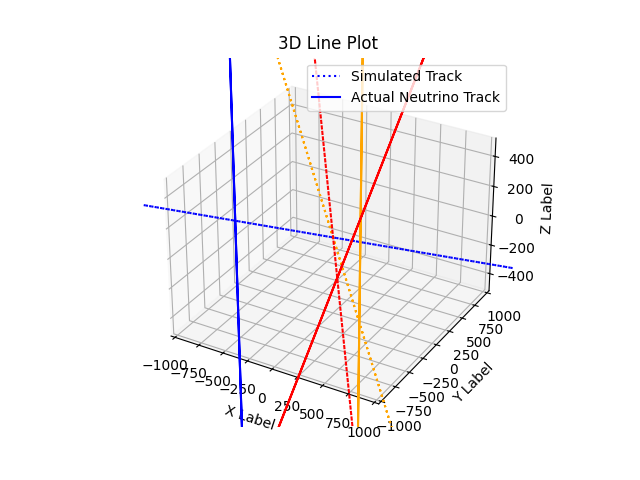

In [55]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
#ax.scatter(sim_x_coords, sim_y_coords, sim_z_coords, c='b', marker='o')
#ax.scatter(real_x_coords, real_y_coords, real_z_coords, c='r', marker='o')

# Plot the lines
#ax.plot(sim_x_coords, sim_y_coords, sim_z_coords, c='g')
#ax.plot(real_x_coords[0], real_y_coords[0], real_z_coords[0], c='r')

# HMain_Reco.sh.o15600964
ax.plot(x_line_sim, y_line_sim, z_line_sim, c='b', label="Simulated Track", linestyle='dotted')
ax.plot(x_line, y_line, z_line, c='b', label="Actual Neutrino Track")

# HMain_Reco.sh.o15612050
ax.plot(a_x_line_sim, a_y_line_sim, a_z_line_sim, c='orange', linestyle='dotted')
ax.plot(a_x_line, a_y_line, a_z_line, c='orange')

# HMain_Reco.sh.o15612055
ax.plot(b_x_line_sim, b_y_line_sim, b_z_line_sim, c='r', linestyle='dotted')
ax.plot(b_x_line, b_y_line, b_z_line, c='r')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_xlim(-1000, 1000)
ax.set_ylabel('Y Label')
ax.set_ylim(-1000, 1000)
ax.set_zlabel('Z Label')
ax.set_zlim(-500, 500)
ax.set_title('3D Line Plot')

plt.legend()
# Show the plot
plt.show()